# Î∂ÑÏÑù Î™©Ìëú: ÏïïÏó∞Í≥µÏ†ïÏóêÏÑú ÌõÑÌåê Scale Î∂àÎüâ Î∞úÏÉù Í∑ºÎ≥∏ ÏõêÏù∏ Î∂ÑÏÑùÍ≥º Í∞úÏÑ† Í∏∞Ìöå ÎèÑÏ∂ú

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats
from scipy import stats
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.stattools import omni_normtest

from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.api import qqplot, add_constant

from sklearn.preprocessing import scale, minmax_scale, robust_scale
from sklearn.preprocessing import StandardScaler


%matplotlib inline

# sns.set(font="AppleGothic")
plt.rc('font',  family='AppleGothic')
plt.rcParams['axes.unicode_minus']=False

# %matplotlib inline
# sns.set(font="AppleGothic")
# plt.rcParams['axes.unicode_minus']=False

# 0.Îç∞Ïù¥ÌÑ∞ Ï°∞ÏÇ¨: ÌõÑÌåê Ï†úÏ°∞ Í≥µÏ†ï Ïù¥Ìï¥

### ÌõÑÌåêÏù¥ÎûÄ?
ÌõÑÌåê Ï†úÌíàÏùÄ ÎëêÍªò 4.5mm Ïù¥ÏÉÅÏùò ÎπÑÍµêÏ†Å ÎëêÍ∫ºÏö¥ Ïó¥Í∞Ñ ÏïïÏó∞ Í∞ïÌåê

### Ï†úÏ°∞ Í≥µÏ†ï 
Ïó∞ÏÜç Ï£ºÏ°∞Í∏∞ÏóêÏÑú ÏÉùÏÇ∞Îêú Ïä¨ÎûòÎ∏å(Slab)Î•º Í≥†Í∞ùÏÇ¨Í∞Ä ÏöîÍµ¨ÌïòÎäî ÏπòÏàòÎ°ú ÏïïÏó∞ Î∞è ÎÉâÍ∞ÅÌïú ÌõÑ ÏµúÏ¢Ö Ï†úÌíà ÌÅ¨Í∏∞Î°ú Ï†àÎã®ÌïòÏó¨ ÏÉùÏÇ∞

### Í∞ÄÏó¥Î°ú>HSB>ÏïïÏó∞(Ï°∞ÏïïÏó∞, ÏÇ¨ÏÉÅÏïïÏó∞)>Í∞ÄÏÜçÎÉâÍ∞Å(TMCP)>Ïó¥Í∞ÑÍµêÏ†ï>Ï†àÎã®>Ïó¥Ï≤òÎ¶¨>Í≤ÄÏÇ¨(Ï¥àÏùåÌåå)

Í∞ÄÏó¥Î°úÎäî Ïû•ÏûÖÎåÄ, ÏòàÏó¥ÎåÄ, Í∞ÄÏó¥ÎåÄ Î∞è Í∑†Ïó¥ÎåÄ ÏàúÏÑúÎ°ú Íµ¨ÏÑ±
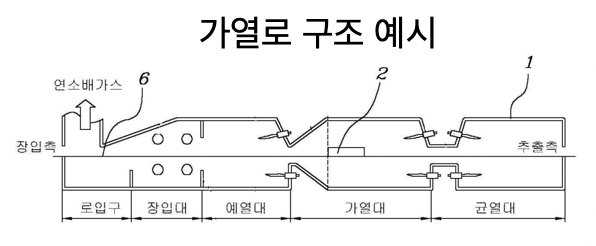

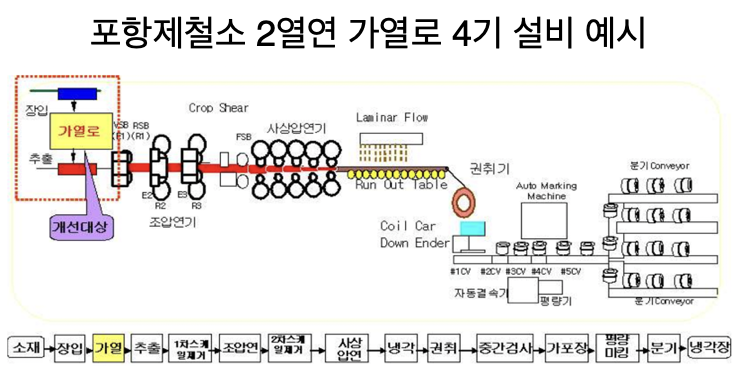

# 1. Í∞ÄÏÑ§ ÏÑ§Ï†ï:  ÏòÅÌñ•ÏùÑ Ï£ºÎäî ÏõêÏù∏ Ïù∏ÏûêÏóê ÎåÄÌïú Í∞ÄÏÑ§ ÏÑ§Ï†ï


# 1. Îç∞Ïù¥ÌÑ∞ ÏàòÏßë

In [2]:
df = pd.read_csv('SCALEÎ∂àÎüâ.csv', engine='python', encoding='cp949')
df.head(n=3)

PLATE_NO         ROLLING_DATE SCALE        SPEC STEEL_KIND  PT_THK  \
0  PB562774  2008-08-01:00:00:15    ÏñëÌíà  AB/EH32-TM         T1   32.25   
1  PB562775  2008-08-01:00:00:16    ÏñëÌíà  AB/EH32-TM         T1   32.25   
2  PB562776  2008-08-01:00:00:59    ÏñëÌíà   NV-E36-TM         T8   33.27   

   PT_WDTH  PT_LTH  PT_WGT FUR_NO  ...  FUR_HZ_TEMP  FUR_HZ_TIME  FUR_SZ_TEMP  \
0     3707   15109   14180    1Ìò∏Í∏∞  ...         1144          116         1133   
1     3707   15109   14180    1Ìò∏Í∏∞  ...         1144          122         1135   
2     3619   19181   18130    2Ìò∏Í∏∞  ...         1129          116         1121   

   FUR_SZ_TIME  FUR_TIME  FUR_EXTEMP  ROLLING_TEMP_T5  HSB ROLLING_DESCALING  \
0           59       282        1125              934   Ï†ÅÏö©                 8   
1           53       283        1120              937   Ï†ÅÏö©                 8   
2           55       282        1106              889   Ï†ÅÏö©                 8   

   WORK_GR  
0       2Ï°∞  
1       2Ï°∞  
2       3Ï°∞  

[3 rows x 21 columns]

# 2. Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú
## Îç∞Ïù¥ÌÑ∞ ÌòÑÌô©(Îç∞Ïù¥ÌÑ∞ ÏÜçÏÑ±, Í∏∞Ïà†ÌÜµÍ≥Ñ, Î∂ÑÌè¨, Ïù¥ÏÉÅÏπò/Í≤∞Ï∏°Ïπò)ÌôïÏù∏ Î∞è Ï≤òÎ¶¨, Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò, 


# 2-1. Îç∞Ïù¥ÌÑ∞ ÏÜçÏÑ±: Î≤îÏ£ºÌòï Î≥ÄÏàòÏôÄ Ïó∞ÏÜçÌòï Î≥ÄÏàò ÌôïÏù∏
Ï¥ù 720Í∞ú Îç∞Ïù¥ÌÑ∞Ïù¥Î©∞ Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÎã§.

Î™©ÌëúÎ≥ÄÏàòÎäî Î≤îÏ£ºÌòï Î≥ÄÏàòÏù¥Í≥†, ÏÑ§Î™Ö Î≥ÄÏàòÏóêÎèÑ Î≤îÏ£ºÌòï Î≥ÄÏàòÍ∞Ä Ï°¥Ïû¨ÌïúÎã§.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLATE_NO           720 non-null    object 
 1   ROLLING_DATE       720 non-null    object 
 2   SCALE              720 non-null    object 
 3   SPEC               720 non-null    object 
 4   STEEL_KIND         720 non-null    object 
 5   PT_THK             720 non-null    float64
 6   PT_WDTH            720 non-null    int64  
 7   PT_LTH             720 non-null    int64  
 8   PT_WGT             720 non-null    int64  
 9   FUR_NO             720 non-null    object 
 10  FUR_NO_ROW         720 non-null    int64  
 11  FUR_HZ_TEMP        720 non-null    int64  
 12  FUR_HZ_TIME        720 non-null    int64  
 13  FUR_SZ_TEMP        720 non-null    int64  
 14  FUR_SZ_TIME        720 non-null    int64  
 15  FUR_TIME           720 non-null    int64  
 16  FUR_EXTEMP         720 non

# 2-2. Îç∞Ïù¥ÌÑ∞ ÏÜçÏÑ±: Í∏∞Ïà†ÌÜµÍ≥ÑÎüâ ÌôïÏù∏


In [4]:
# object Îç∞Ïù¥ÌÑ∞ÏôÄ Ïà´ÏûêÌòï Îç∞Ïù¥ÌÑ∞ 
# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä, SVM, NN, K-NN Î™®Îç∏ÏùÑ ÏúÑÌïú scale Î≥ÄÌôò ÌïÑÏöîÏÑ± ÌôïÏù∏
df_num=df.select_dtypes(exclude='object')
df_char=df.select_dtypes(include='object')

In [5]:
df_num.describe()

PT_THK      PT_WDTH        PT_LTH         PT_WGT  FUR_NO_ROW  \
count  720.000000   720.000000    720.000000     720.000000  720.000000   
mean    29.267857  2807.127778  34323.269444   41481.777778    1.497222   
std     19.152651   517.839690  13828.434837   24751.322015    0.500340   
min     12.030000  1800.000000   7893.000000    7820.000000    1.000000   
25%     16.090000  2466.000000  22663.000000   17757.500000    1.000000   
50%     20.130000  2725.000000  37380.000000   36120.000000    1.000000   
75%     40.000000  3125.000000  43735.000000   61120.000000    2.000000   
max    100.340000  4575.000000  54917.000000  115080.000000    2.000000   

       FUR_HZ_TEMP  FUR_HZ_TIME  FUR_SZ_TEMP  FUR_SZ_TIME    FUR_TIME  \
count   720.000000   720.000000   720.000000   720.000000  720.000000   
mean   1155.338889    88.204167  1149.666667    75.330556  300.563889   
std      20.866398    36.248696    17.571788    26.086390   45.390303   
min    1103.000000    43.000000  1113.000000    35.000000  221.000000   
25%    1139.000000    65.000000  1132.000000    57.750000  257.000000   
50%    1158.000000    75.000000  1155.000000    67.500000  304.000000   
75%    1171.000000   101.000000  1164.000000    85.250000  342.000000   
max    1206.000000   251.000000  1185.000000   194.000000  398.000000   

        FUR_EXTEMP  ROLLING_TEMP_T5  ROLLING_DESCALING  
count   720.000000       720.000000         720.000000  
mean   1139.570833       933.920833           8.319444  
std      17.857121       107.863887           1.623252  
min    1102.000000         0.000000           5.000000  
25%    1122.750000       889.750000           6.000000  
50%    1144.000000       951.000000           8.000000  
75%    1154.000000       994.250000          10.000000  
max    1175.000000      1078.000000          10.000000

In [6]:
df_char

PLATE_NO         ROLLING_DATE SCALE        SPEC STEEL_KIND FUR_NO HSB  \
0    PB562774  2008-08-01:00:00:15    ÏñëÌíà  AB/EH32-TM         T1    1Ìò∏Í∏∞  Ï†ÅÏö©   
1    PB562775  2008-08-01:00:00:16    ÏñëÌíà  AB/EH32-TM         T1    1Ìò∏Í∏∞  Ï†ÅÏö©   
2    PB562776  2008-08-01:00:00:59    ÏñëÌíà   NV-E36-TM         T8    2Ìò∏Í∏∞  Ï†ÅÏö©   
3    PB562777  2008-08-01:00:01:24    ÏñëÌíà   NV-E36-TM         T8    2Ìò∏Í∏∞  Ï†ÅÏö©   
4    PB562778  2008-08-01:00:01:44    ÏñëÌíà  BV-EH36-TM         T8    3Ìò∏Í∏∞  Ï†ÅÏö©   
..        ...                  ...   ...         ...        ...    ...  ..   
715  PB563502  2008-08-02:13:35:36    Î∂àÎüâ       NK-KA         C0    3Ìò∏Í∏∞  Ï†ÅÏö©   
716  PB563503  2008-08-02:13:35:02    ÏñëÌíà      NV-A32         C0    2Ìò∏Í∏∞  Ï†ÅÏö©   
717  PB563504  2008-08-02:14:40:00    ÏñëÌíà      NV-A32         C0    2Ìò∏Í∏∞  Ï†ÅÏö©   
718  PB563505  2008-08-02:13:35:19    ÏñëÌíà        LR-A         C0    3Ìò∏Í∏∞  Ï†ÅÏö©   
719  PB563506  2008-08-02:14:40:53    ÏñëÌíà      GL-A32         C0    3Ìò∏Í∏∞  Ï†ÅÏö©   

    WORK_GR  
0        2Ï°∞  
1        2Ï°∞  
2        3Ï°∞  
3        3Ï°∞  
4        1Ï°∞  
..      ...  
715      2Ï°∞  
716      1Ï°∞  
717      4Ï°∞  
718      2Ï°∞  
719      2Ï°∞  

[720 rows x 8 columns]

In [7]:
# SPEC
pd.crosstab(df['SCALE'],df['SPEC'])

SPEC   A131-DH36TM  A283-C  A516-60  A709-36  AB/A  AB/AH32  AB/B  AB/EH32-TM  \
SCALE                                                                           
Î∂àÎüâ               1       5        1        0     4        1     3           0   
ÏñëÌíà               0       1        1        1     3        4     3           2   

SPEC   AB/EH36-TM  API-2W-50T  ...  NV-A32-TM  NV-A36-TM  NV-B  NV-D32-TM  \
SCALE                          ...                                          
Î∂àÎüâ              1           0  ...          1          0     2          0   
ÏñëÌíà             16           2  ...          2          2     1          4   

SPEC   NV-D36-TM  NV-E32-TM  NV-E36-TM  PILAC-BT33  SA283-C  V42JBN3  
SCALE                                                                 
Î∂àÎüâ             1          0          0           2       10        1  
ÏñëÌíà             4          2          5          38       11        3  

[2 rows x 66 columns]

In [8]:
for _ in pd.crosstab(df['SCALE'],df['SPEC']).columns:
    print(_)

A131-DH36TM
A283-C
A516-60
A709-36
AB/A
AB/AH32
AB/B
AB/EH32-TM
AB/EH36-TM
API-2W-50T
BV-A
BV-AH32
BV-AH32-TM
BV-AH36-TL
BV-AH36-TM
BV-B
BV-EH32-TM
BV-EH36-TM
CCS-B
COMMON
GL-A
GL-A32
GL-A32-TM
GL-A36-TM
GL-D36-TM
GL-E32-TM
GL-E36-TM
JS-SM400A
JS-SM400B
JS-SM490A
JS-SM490YA
JS-SM490YB
JS-SS400
KR-A
KR-AH32
KR-B
KS-HSB500
KS-HSB600
KS-SM400A
KS-SM400B
KS-SM490A
KS-SM490B
KS-SS400
LR-A
LR-AH32
LR-AH36
LR-AH36-TM
LR-B
LR-EH32-TM
LR-EH36-TM
NK-KA
NK-KA32
NK-KA32-TM
NK-KD36-TM
NV-A
NV-A32
NV-A32-TM
NV-A36-TM
NV-B
NV-D32-TM
NV-D36-TM
NV-E32-TM
NV-E36-TM
PILAC-BT33
SA283-C
V42JBN3


In [9]:
# Ïö∞ÏÑ∏Ìïú Í∞ïÏ¢ÖÏùÄ C0Ïù¥Îã§.
# C1ÏùÄ Î∂àÎüâÎ•† 100%Ïù¥Îã§.
# T3Îäî Î∂àÎüâÎ•† 0%Ïù¥Îã§.
# ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ±: Í∞ïÏ¢ÖÏóêÎäî C, T typeÏù¥ ÏûàÎã§.
pd.crosstab(df['SCALE'],df['STEEL_KIND'], margins=True)

STEEL_KIND   C0  C1  C3  T0  T1  T3  T5  T7  T8  All
SCALE                                               
Î∂àÎüâ          212   1   1   2   2   0   2   6   5  231
ÏñëÌíà          291   0   6  14  16   2  41  29  90  489
All         503   1   7  16  18   2  43  35  95  720

In [10]:
# 3Ìò∏Í∏∞ Î∂àÎüâ Î∞úÏÉù ÎπÑÏú®Ïù¥ 1Ìò∏Í∏∞, 2Ìò∏Í∏∞ Î≥¥Îã§ ÎÜíÎã§
pd.crosstab(df['SCALE'],df['FUR_NO'], margins=True, normalize=True).round(2)

FUR_NO   1Ìò∏Í∏∞   2Ìò∏Í∏∞   3Ìò∏Í∏∞   All
SCALE                         
Î∂àÎüâ      0.10  0.10  0.12  0.32
ÏñëÌíà      0.23  0.23  0.22  0.68
All     0.33  0.33  0.34  1.00

In [11]:
# HSBÎ•º Ï†ÅÏö©ÌïòÏßÄ ÏïäÏúºÎ©¥ 100% Î∂àÎüâ Î∞úÏÉù
# ÌïòÏßÄÎßå HSBÎ•º Ï†ÅÏö©Ìï¥ÎèÑ Î∂àÎüâÏù¥ Î∞úÏÉù Í∞ÄÎä•-> HSB Ïù¥ÌõÑ Í≥µÏ†ï Îã®Í≥ÑÏóêÏÑú Î∂àÎüâÏù¥ Î∞úÏÉùÌïòÎäî Í≤ÉÏùÑ ÏïîÏãú
pd.crosstab(df['SCALE'],df['HSB'])

HSB    ÎØ∏Ï†ÅÏö©   Ï†ÅÏö©
SCALE          
Î∂àÎüâ      33  198
ÏñëÌíà       0  489

In [12]:
# 1Ï°∞ Î∂àÎüâ Î∞úÏÉùÎ•†(ÏñëÌíà Í∞úÏàò ÎåÄÎπÑ Î∂àÎüâ Í∞úÏàò)Ïù¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÜíÏùå
# 2Ï°∞ Î∂àÎüâ Î∞úÏÉùÎ•†(ÏñëÌíà Í∞úÏàò ÎåÄÎπÑ Î∂àÎüâ Í∞úÏàò)Ïù¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏùå
pd.crosstab(df['SCALE'],df['WORK_GR'], margins=True, normalize=True).round(2)

WORK_GR    1Ï°∞    2Ï°∞    3Ï°∞    4Ï°∞   All
SCALE                                
Î∂àÎüâ       0.09  0.06  0.08  0.09  0.32
ÏñëÌíà       0.17  0.17  0.16  0.18  0.68
All      0.26  0.23  0.24  0.27  1.00

# 2-3. Î≥ÄÏàòÎì§Ïùò Í≤∞Ï∏°Ïπò ÌôïÏù∏ Î∞è Ï≤òÎ¶¨
### Í≤∞Ï∏°Ïπò ÏóÜÏùå

In [13]:
#Í≤∞Ï∏°Ïπò
df.isna().sum()

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

# 2-4. Î≥ÄÏàòÎì§Ïùò Ïù¥ÏÉÅÏπò ÌôïÏù∏ Î∞è Ï≤òÎ¶¨

### ÌïÑÏöîÏÑ±

Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ÏùÄ Ïù¥ÏÉÅÏπòÍ∞Ä ÏÑ†Ìòï Î™®Îç∏ÏóêÏÑú Î∞úÏÉù Í∞ÄÎä•Ìïú ÏòÅÏó≠Ïóê Ï°¥Ïû¨ÌïúÎã§Î©¥ Í∞ïÌïú ÏÑ†ÌòïÏÑ±ÏùÑ Í∞ÄÏßÄÎäî Í≤ÉÏúºÎ°ú Ïò§ÌåêÎê† Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê, Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨Í∞Ä ÌïÑÏöîÌïòÎã§.


# Î≥ÄÏàò Ï†úÍ±∞: 'SPEC', 'PLATE_NO', 'ROLLING_DATE'

In [14]:
df = df.drop(['SPEC', 'PLATE_NO', 'ROLLING_DATE'], axis=1)
df_num=df.select_dtypes(exclude='object')
df_char=df.select_dtypes(include='object')

# Î∂ÑÌè¨ ÌôïÏù∏: Î™©ÌëúÎ≥ÄÏàò
### Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ï§ë Scale Î∂àÎüâÎ•†ÏùÄ 32.1%Ïù¥Îã§.

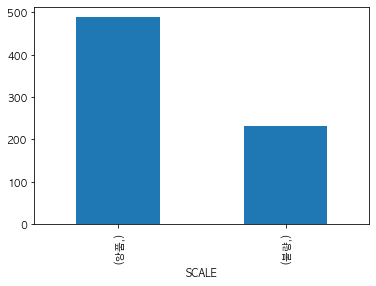

SCALE
ÏñëÌíà       489
Î∂àÎüâ       231
dtype: int64


In [15]:
df_cnt= df[['SCALE']].value_counts()
df_cnt.plot.bar()
plt.show()
plt.close()
print(df[['SCALE']].value_counts())

# Î∂ÑÌè¨ ÌôïÏù∏: ÏÑ§Î™ÖÎ≥ÄÏàò(Ïó∞ÏÜçÌòï) ÌûàÏä§ÌÜ†Í∑∏Îû®=>Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ ÌïÑÏöîÏÑ± ÌôïÏù∏


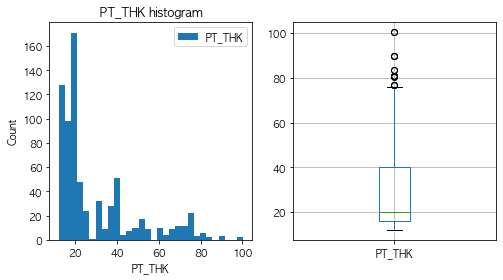

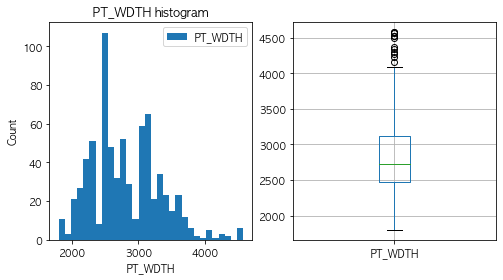

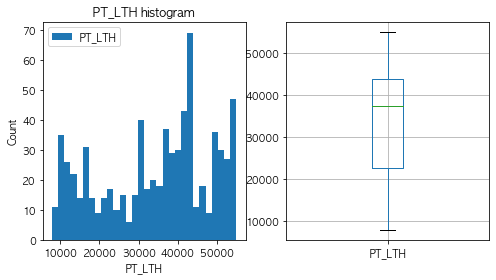

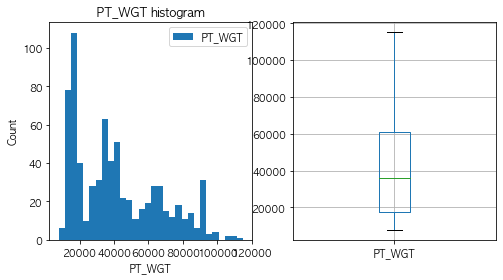

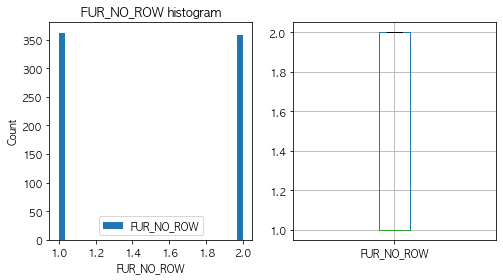

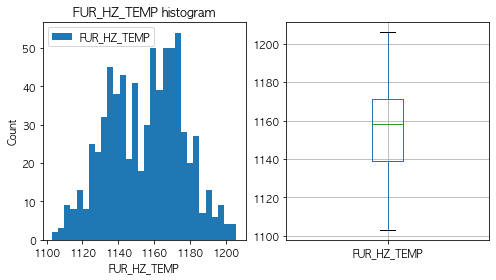

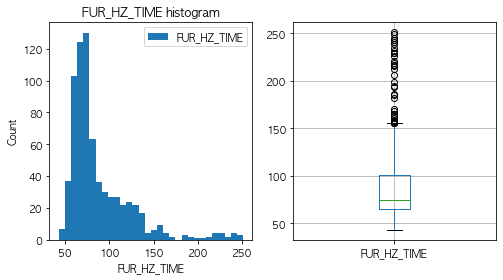

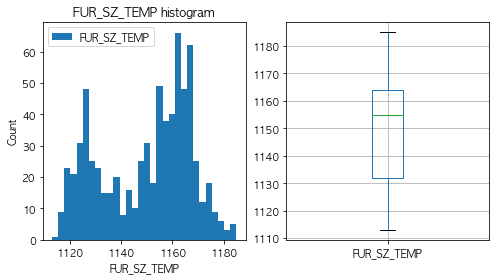

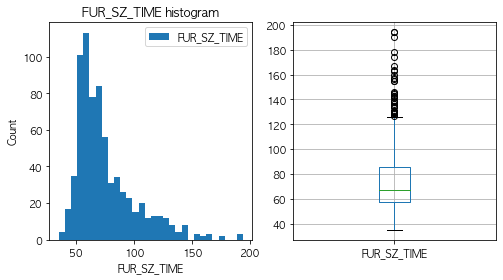

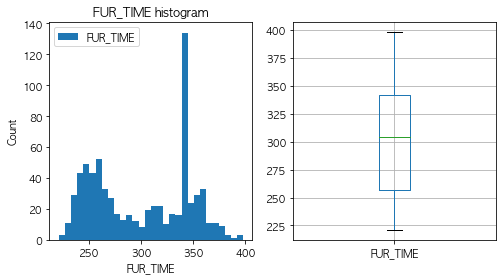

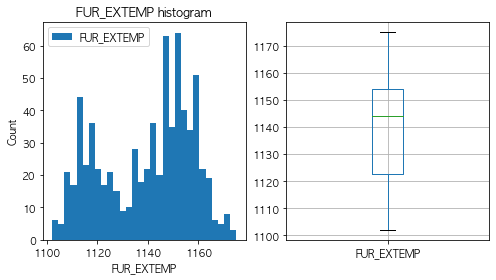

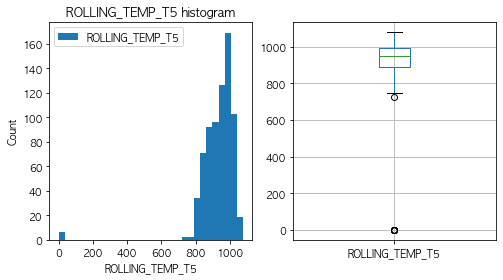

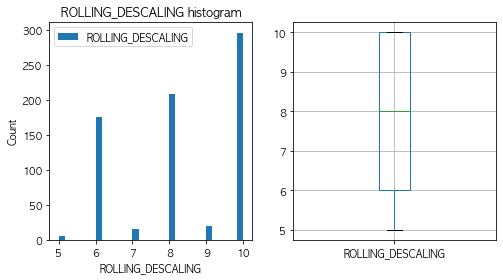

In [16]:
df_x = df.drop(['SCALE'],axis=1).select_dtypes(exclude='object')


for label in df_x.columns:
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.hist(df_x[label], label=label, bins=30)
    plt.legend()
    plt.title(label+' histogram')
    plt.ylabel('Count')
    plt.xlabel(label)
    
    plt.subplot(1,2,2)
    df_x[[label]].boxplot()

    plt.show()
    plt.close()

# Î∂ÑÌè¨ ÌôïÏù∏: ÏÑ§Î™ÖÎ≥ÄÏàò(Î≤îÏ£ºÌòï) barplot
Í∞ïÏ¢ÖÏùÄ C0Í∞Ä Ïö∞ÏÑ∏ÌïòÎã§.

ÎåÄÎ∂ÄÎ∂Ñ ÌõÑÌåêÏóê HSB Ï†ÅÏö©Ïù¥ ÎêòÏóàÎã§.

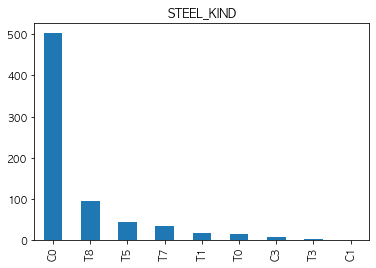

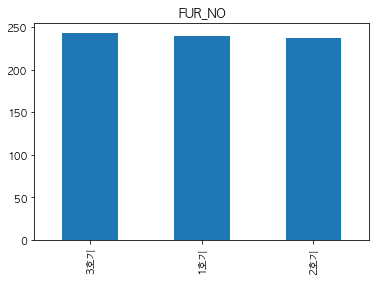

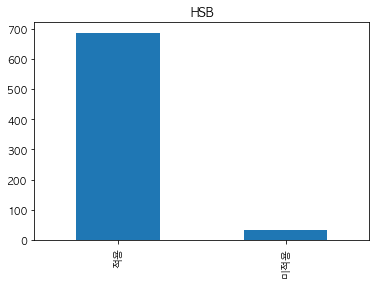

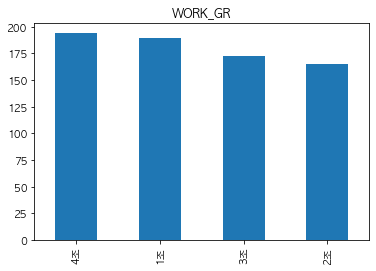

In [17]:
df_x = df.drop(['SCALE'],axis=1).select_dtypes(include='object')

for c in df_x.columns:
    df_cnt= df[c].value_counts()
    df_cnt.plot.bar()
    plt.title(c)
    plt.show()
    plt.close()

# Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨

IQR Í∏∞Ï§ÄÏúºÎ°ú Ï†úÍ±∞

In [18]:
df_num=df.select_dtypes(exclude='object')
df_char=df.select_dtypes(include='object')

In [19]:
collist=df_num.columns
for i in collist:
    print(i)
    quartile_1 = df_num[i].quantile(0.25)
    quartile_3 = df_num[i].quantile(0.75)
    IQR = quartile_3 - quartile_1
    
    lowest, highest = quartile_1 - 1.5 * IQR, quartile_3 + 1.5 * IQR
    df_num = df_num[(df_num[i]>=lowest)&(df_num[i]<=highest)]
    print(len(df_num.index))

PT_THK
704
PT_WDTH
692
PT_LTH
692
PT_WGT
692
FUR_NO_ROW
692
FUR_HZ_TEMP
692
FUR_HZ_TIME
660
FUR_SZ_TEMP
660
FUR_SZ_TIME
630
FUR_TIME
630
FUR_EXTEMP
630
ROLLING_TEMP_T5
626
ROLLING_DESCALING
626


# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Í≤∞Í≥º
1.5*IQR Ïù¥ÏÉÅ ÎòêÎäî Ïù¥Ìïò Íµ¨Í∞ÑÏóê Ìï¥ÎãπÌïòÎäî Ïù¥ÏÉÅÏπòÍ∞Ä Ï†úÍ±∞ ÎêòÏóàÎã§.

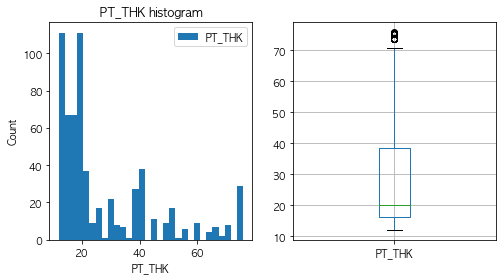

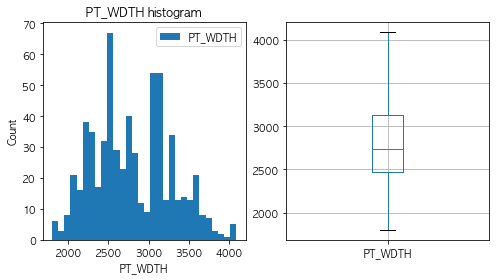

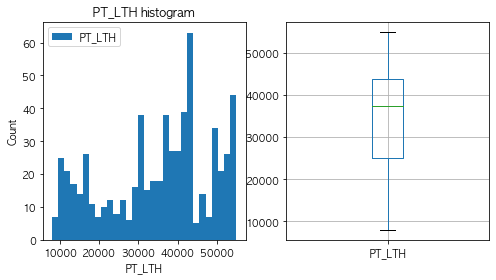

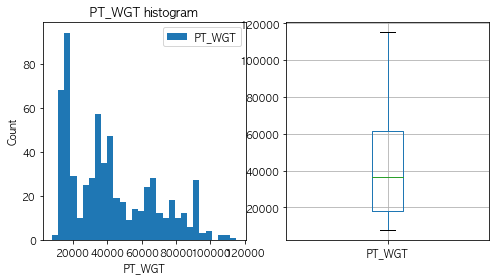

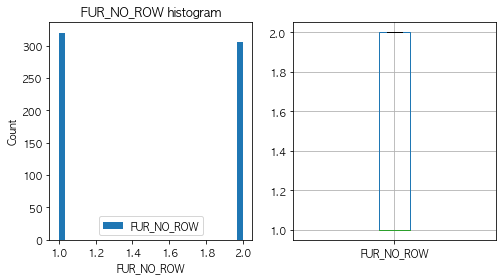

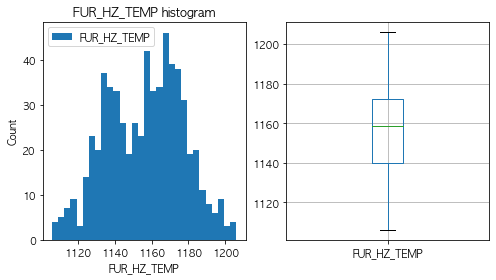

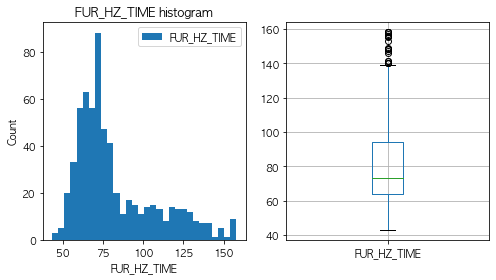

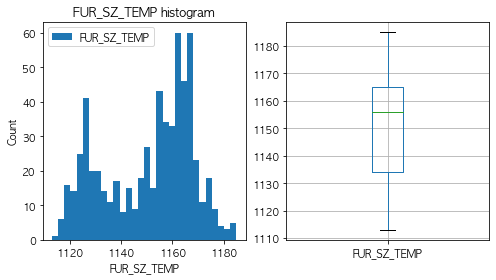

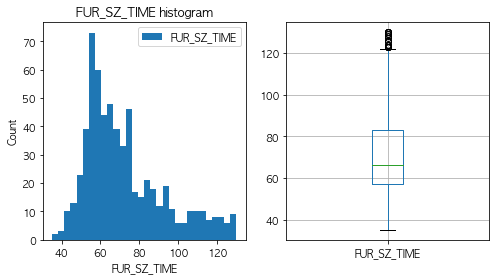

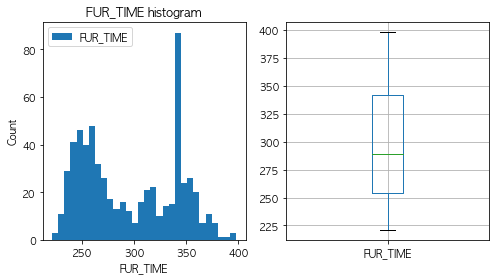

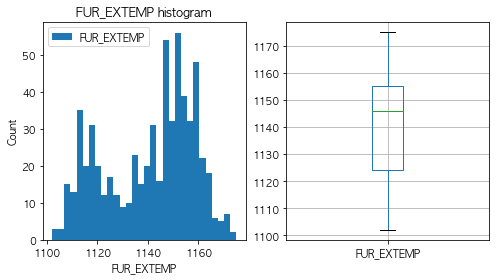

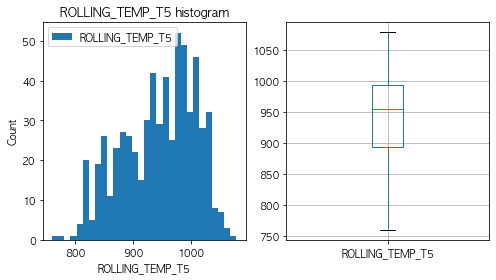

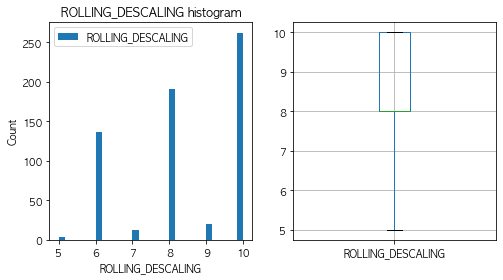

In [20]:
for label in df_num.columns:
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.hist(df_num[label], label=label, bins=30)
    plt.legend()
    plt.title(label+' histogram')
    plt.ylabel('Count')
    plt.xlabel(label)
    
    plt.subplot(1,2,2)
    df_num[[label]].boxplot()

    plt.show()
    plt.close()

# 2-5. Î≥ÄÏàò ÌååÏÉù Î∞è Î≥ÄÌôò

## ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ±: Í∞ïÏ¢ÖÏùÑ C ÎòêÎäî TÎ°ú Ïû¨Î∂ÑÎ•ò

In [21]:
df['STEEL_KIND'] = df['STEEL_KIND'].apply(lambda x: 'C' if x[0]=='C' else x)
df['STEEL_KIND'] = df['STEEL_KIND'].apply(lambda x: 'T' if x[0]=='T' else x)
df_num=df.select_dtypes(exclude='object')
df_char=df.select_dtypes(include='object')

## Scale Î≥ÄÌôò

In [22]:
scaler = StandardScaler()
np_num_scaled = scaler.fit_transform(df_num)
df_num_scaled= pd.DataFrame(np_num_scaled, columns=df_num.columns)

df_scaled = pd.concat([df_num_scaled, df_char], axis=1)
df_scaled.head()

PT_THK   PT_WDTH    PT_LTH    PT_WGT  FUR_NO_ROW  FUR_HZ_TEMP  \
0  0.155812  1.738951 -1.390441 -1.103810   -0.994460    -0.543782   
1  0.155812  1.738951 -1.390441 -1.103810    1.005571    -0.543782   
2  0.209106  1.568896 -1.095771 -0.944112   -0.994460    -1.263141   
3  0.209106  1.568896 -1.095771 -0.944112    1.005571    -0.160124   
4  0.473482  0.562094 -1.518889 -1.174562   -0.994460    -0.735611   

   FUR_HZ_TIME  FUR_SZ_TEMP  FUR_SZ_TIME  FUR_TIME  FUR_EXTEMP  \
0     0.767342    -0.949149    -0.626453 -0.409268   -0.816535   
1     0.932981    -0.835252    -0.856618 -0.387221   -1.096730   
2     0.767342    -1.632537    -0.779897 -0.409268   -1.881276   
3     1.015800    -1.290843    -0.281206  0.340311   -1.489003   
4     1.264257    -1.233894    -1.048422  0.296219   -1.208808   

   ROLLING_TEMP_T5  ROLLING_DESCALING SCALE STEEL_KIND FUR_NO HSB WORK_GR  
0         0.000734           -0.19693    ÏñëÌíà          T    1Ìò∏Í∏∞  Ï†ÅÏö©      2Ï°∞  
1         0.028567           -0.19693    ÏñëÌíà          T    1Ìò∏Í∏∞  Ï†ÅÏö©      2Ï°∞  
2        -0.416748           -0.19693    ÏñëÌíà          T    2Ìò∏Í∏∞  Ï†ÅÏö©      3Ï°∞  
3        -0.453858           -0.19693    ÏñëÌíà          T    2Ìò∏Í∏∞  Ï†ÅÏö©      3Ï°∞  
4        -0.565186           -0.19693    ÏñëÌíà          T    3Ìò∏Í∏∞  Ï†ÅÏö©      1Ï°∞

# 3. EDA: ÏÉÅÍ¥ÄÎ∂ÑÏÑù
## ÏÑ§Î™ÖÎ≥ÄÏàò(Ïó∞ÏÜçÌòï)Îì§ ÏÇ¨Ïù¥Ïùò ÏÉÅÍ¥ÄÎ∂ÑÏÑù

### Í∞ÄÏó¥Î°ú Ï∂îÏ∂úÏò®ÎèÑ Í∞ÄÏó¥Î°ú Í∑†Ïó¥ÎåÄÏò®ÎèÑÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò 0.99Î°ú Îß§Ïö∞ ÎÜíÏùÄ ÌòÑÏÉÅ
### Ïù¥Ïú†: "Í∞ÄÏó¥Î°ú Ï∂îÏ∂úÏò®ÎèÑ =  Í∞ÄÏó¥Î°ú Í∑†Ïó¥ÎåÄÏóêÏÑú slabÍ∞Ä Ï∂îÏ∂úÎê† Îïå Ïò®ÎèÑ"Ïù¥ÎØÄÎ°ú ÎãπÏó∞Ìïú Í≤∞Í≥º.
### Í≤∞Ï†ï: Í∞ÄÏó¥Î°ú Ï∂îÏ∂úÏò®ÎèÑÎ•º Ï†úÍ±∞

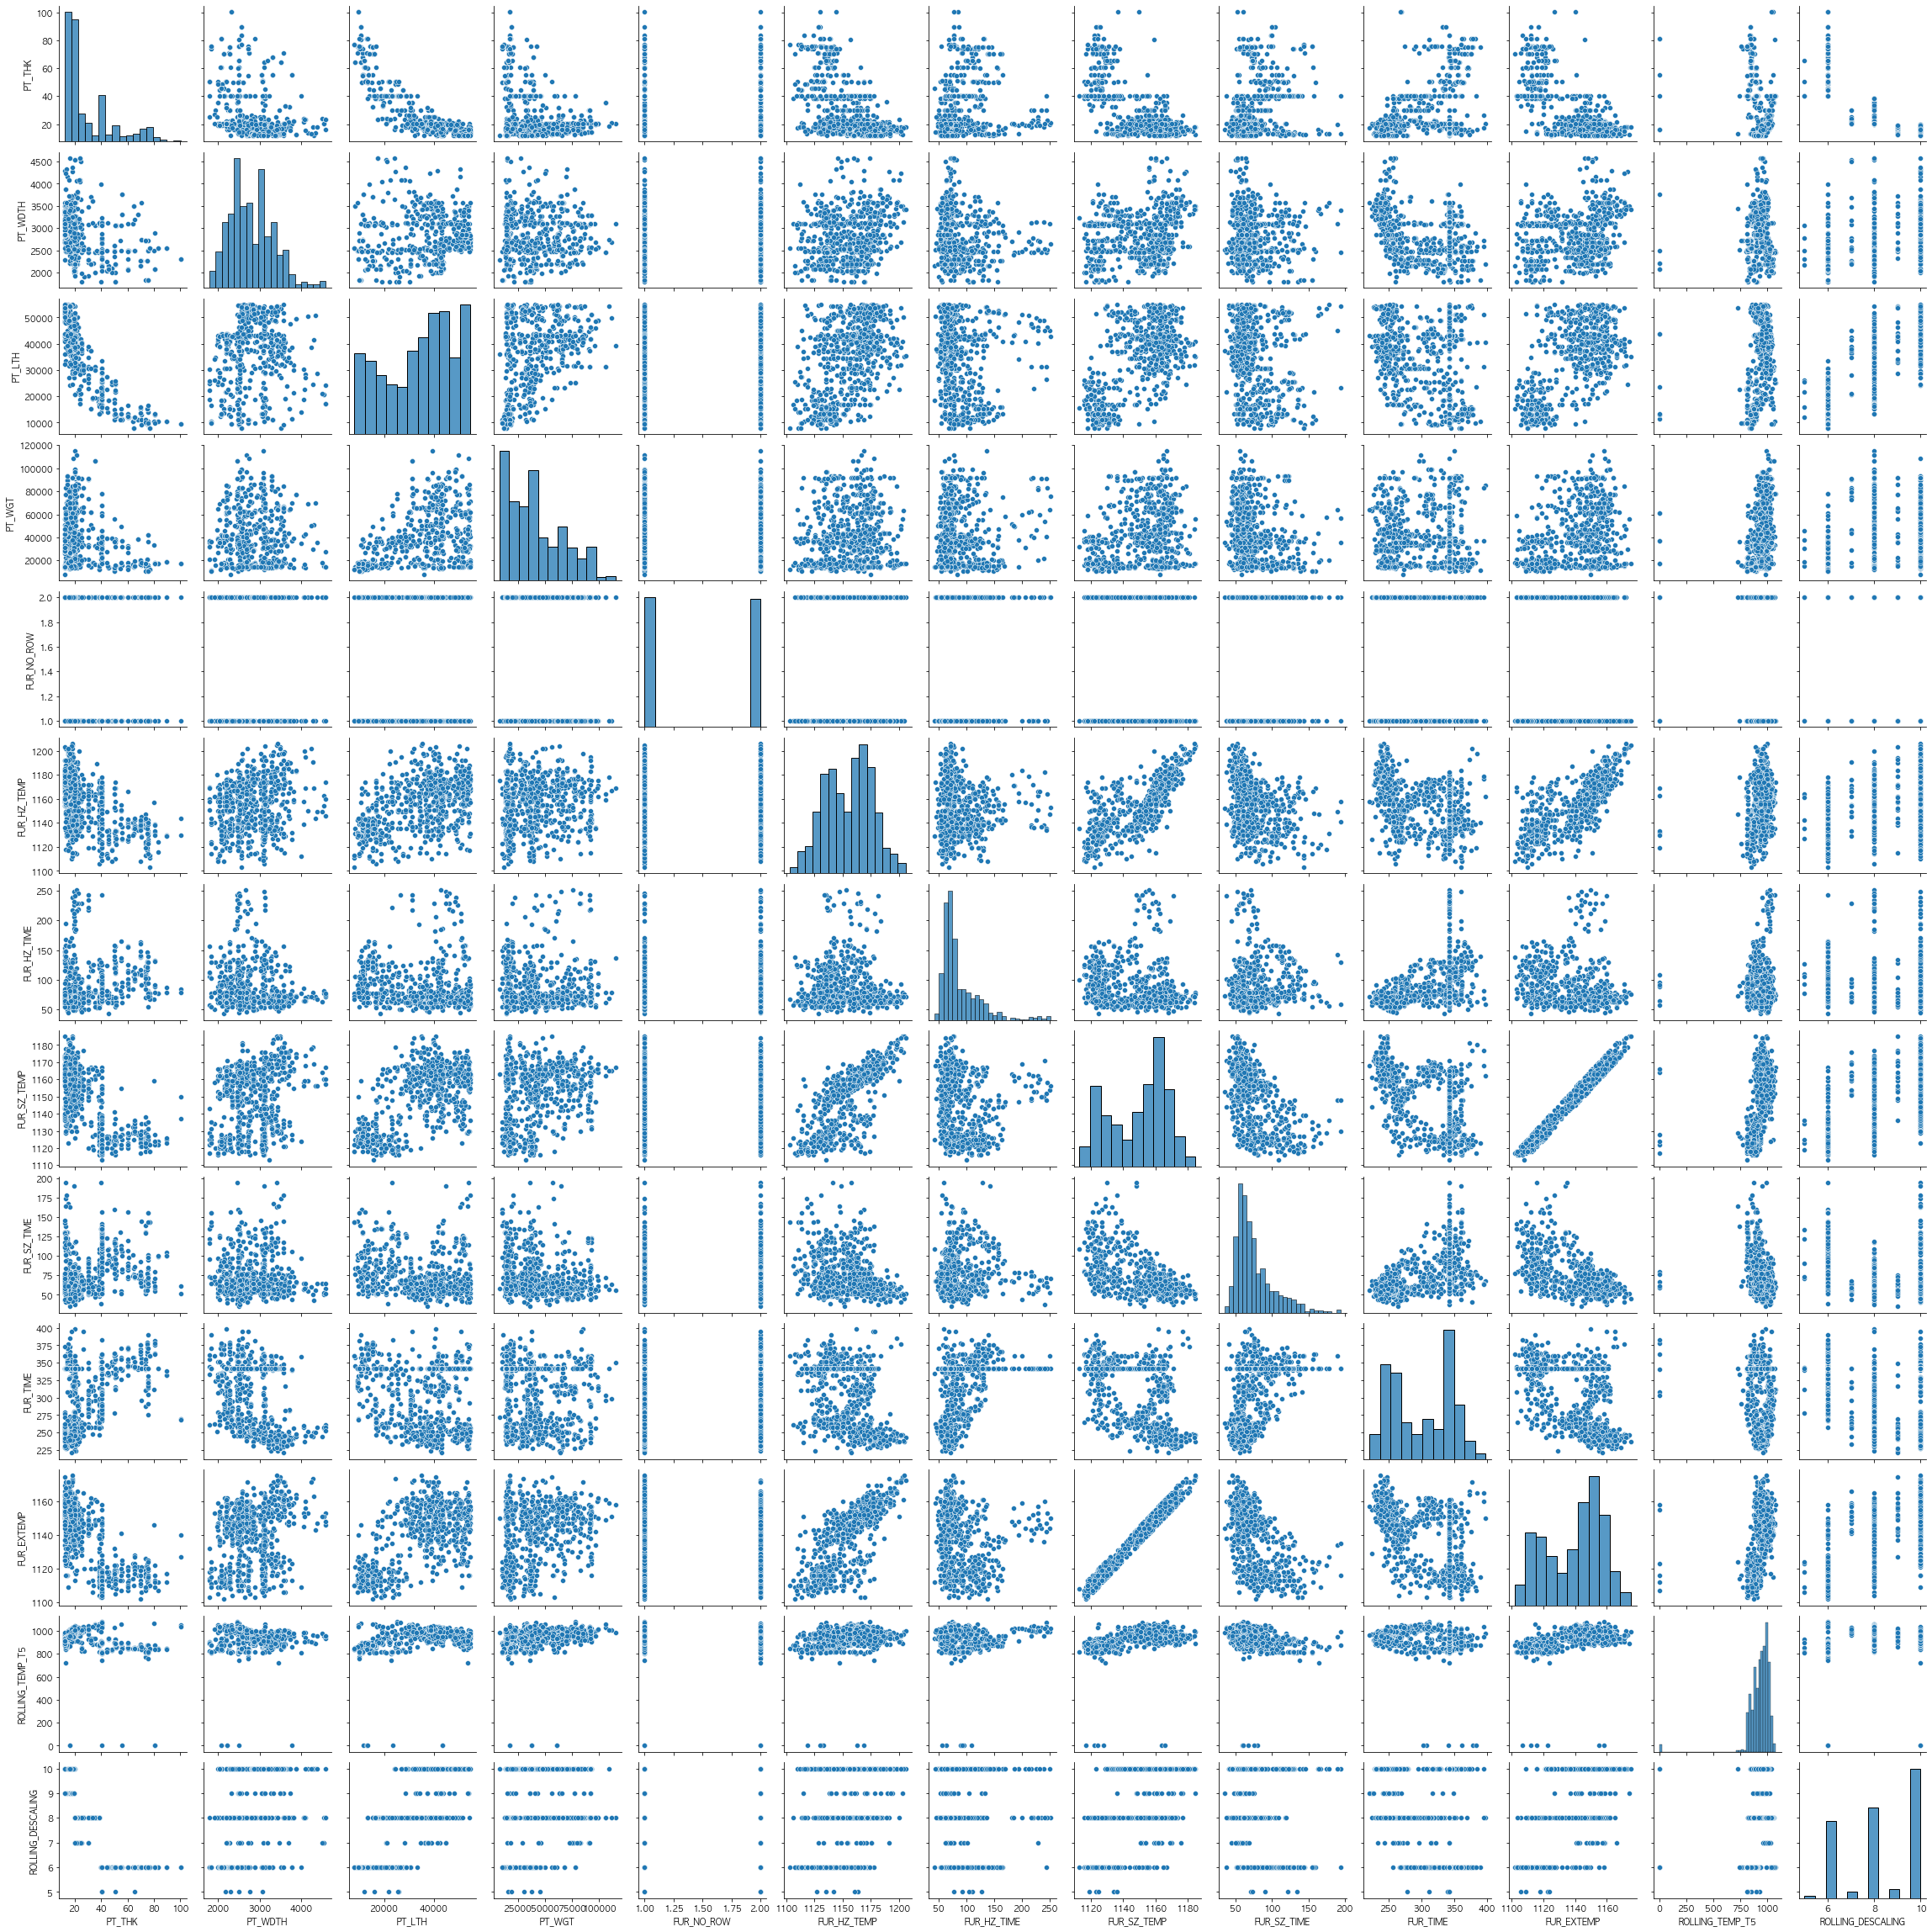

In [23]:
sns.pairplot(df_num)

In [24]:
df_num.corr().round(2)

PT_THK  PT_WDTH  PT_LTH  PT_WGT  FUR_NO_ROW  FUR_HZ_TEMP  \
PT_THK               1.00    -0.31   -0.86   -0.40       -0.00        -0.52   
PT_WDTH             -0.31     1.00    0.12    0.03        0.01         0.18   
PT_LTH              -0.86     0.12    1.00    0.45       -0.02         0.47   
PT_WGT              -0.40     0.03    0.45    1.00       -0.02         0.15   
FUR_NO_ROW          -0.00     0.01   -0.02   -0.02        1.00         0.00   
FUR_HZ_TEMP         -0.52     0.18    0.47    0.15        0.00         1.00   
FUR_HZ_TIME          0.17    -0.13   -0.09    0.01       -0.01        -0.11   
FUR_SZ_TEMP         -0.69     0.23    0.65    0.36        0.01         0.77   
FUR_SZ_TIME          0.27    -0.05   -0.23   -0.19        0.06        -0.33   
FUR_TIME             0.41    -0.39   -0.25   -0.06        0.02        -0.35   
FUR_EXTEMP          -0.69     0.22    0.64    0.36        0.01         0.76   
ROLLING_TEMP_T5     -0.37    -0.02    0.31    0.26       -0.00         0.27   
ROLLING_DESCALING   -0.84     0.34    0.81    0.24        0.02         0.47   

                   FUR_HZ_TIME  FUR_SZ_TEMP  FUR_SZ_TIME  FUR_TIME  \
PT_THK                    0.17        -0.69         0.27      0.41   
PT_WDTH                  -0.13         0.23        -0.05     -0.39   
PT_LTH                   -0.09         0.65        -0.23     -0.25   
PT_WGT                    0.01         0.36        -0.19     -0.06   
FUR_NO_ROW               -0.01         0.01         0.06      0.02   
FUR_HZ_TEMP              -0.11         0.77        -0.33     -0.35   
FUR_HZ_TIME               1.00        -0.21         0.07      0.48   
FUR_SZ_TEMP              -0.21         1.00        -0.57     -0.48   
FUR_SZ_TIME               0.07        -0.57         1.00      0.49   
FUR_TIME                  0.48        -0.48         0.49      1.00   
FUR_EXTEMP               -0.20         0.99        -0.57     -0.47   
ROLLING_TEMP_T5           0.01         0.45        -0.27     -0.20   
ROLLING_DESCALING        -0.15         0.65        -0.29     -0.37   

                   FUR_EXTEMP  ROLLING_TEMP_T5  ROLLING_DESCALING  
PT_THK                  -0.69            -0.37              -0.84  
PT_WDTH                  0.22            -0.02               0.34  
PT_LTH                   0.64             0.31               0.81  
PT_WGT                   0.36             0.26               0.24  
FUR_NO_ROW               0.01            -0.00               0.02  
FUR_HZ_TEMP              0.76             0.27               0.47  
FUR_HZ_TIME             -0.20             0.01              -0.15  
FUR_SZ_TEMP              0.99             0.45               0.65  
FUR_SZ_TIME             -0.57            -0.27              -0.29  
FUR_TIME                -0.47            -0.20              -0.37  
FUR_EXTEMP               1.00             0.44               0.64  
ROLLING_TEMP_T5          0.44             1.00               0.27  
ROLLING_DESCALING        0.64             0.27               1.00

# 3. EDA: Í≤ÄÏ†ï

## Î™©ÌëúÎ≥ÄÏàò(Î≤îÏ£ºÌòï)ÏôÄ ÏÑ§Î™ÖÎ≥ÄÏàò(Î≤îÏ£ºÌòï)Ïùò ÏÉÅÌò∏ Í¥ÄÎ†®ÏÑ± Í≤ÄÏ†ï: Ïπ¥Ïù¥Ï†úÍ≥± ÎèÖÎ¶ΩÏÑ± Í≤ÄÏ†ï

In [25]:
from scipy import stats
from scipy.stats import chi2_contingency

print('chi-square test')
for i in df_char.drop(['SCALE'], axis=1).columns:
    chi, pval, dof, expected = stats.chi2_contingency(pd.crosstab(df_char['SCALE'],df_char[i]))
    if pval<0.05:
        print('{} p-value: {:0.10f}'.format(i, pval))


chi-square test
STEEL_KIND p-value: 0.0000000000
HSB p-value: 0.0000000000


# 3. EDA: Ïû†Ïû¨Ïù∏Ïûê ÎèÑÏ∂ú (Ïó∞ÏÜçÌòï ÏÑ§Î™ÖÎ≥ÄÏàò)

In [26]:
df_raw=df_scaled
df_raw.head(n=3)

PT_THK   PT_WDTH    PT_LTH    PT_WGT  FUR_NO_ROW  FUR_HZ_TEMP  \
0  0.155812  1.738951 -1.390441 -1.103810   -0.994460    -0.543782   
1  0.155812  1.738951 -1.390441 -1.103810    1.005571    -0.543782   
2  0.209106  1.568896 -1.095771 -0.944112   -0.994460    -1.263141   

   FUR_HZ_TIME  FUR_SZ_TEMP  FUR_SZ_TIME  FUR_TIME  FUR_EXTEMP  \
0     0.767342    -0.949149    -0.626453 -0.409268   -0.816535   
1     0.932981    -0.835252    -0.856618 -0.387221   -1.096730   
2     0.767342    -1.632537    -0.779897 -0.409268   -1.881276   

   ROLLING_TEMP_T5  ROLLING_DESCALING SCALE STEEL_KIND FUR_NO HSB WORK_GR  
0         0.000734           -0.19693    ÏñëÌíà          T    1Ìò∏Í∏∞  Ï†ÅÏö©      2Ï°∞  
1         0.028567           -0.19693    ÏñëÌíà          T    1Ìò∏Í∏∞  Ï†ÅÏö©      2Ï°∞  
2        -0.416748           -0.19693    ÏñëÌíà          T    2Ìò∏Í∏∞  Ï†ÅÏö©      3Ï°∞

In [27]:
df_raw.replace({'SCALE': 'Î∂àÎüâ'}, 1, inplace=True)
df_raw.replace({'SCALE': 'ÏñëÌíà'}, 0, inplace=True)


In [28]:
df_raw_x = df_raw.drop('SCALE', axis=1)
df_raw_y = df_raw['SCALE']

In [29]:
def fun_plot_hist(data, var):#, meaning=[]):
    min_, max_ = min(data[var]), max(data[var])
    plt.hist(data[data["SCALE"] == "ÏñëÌíà"][var], label = "ÏñëÌíà", alpha = 0.3, range=(min_, max_), color ='blue')
    plt.hist(data[data["SCALE"] == "Î∂àÎüâ"][var], label = "Î∂àÎüâ", alpha = 0.5, range=(min_, max_), color ='red')
    plt.legend()
    plt.xlabel(var)
    plt.legend(loc=1)
    plt.show()
    plt.close()

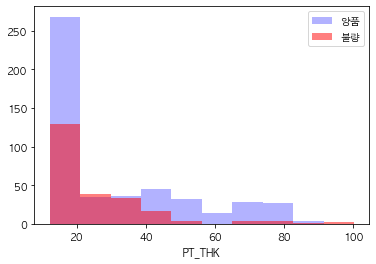

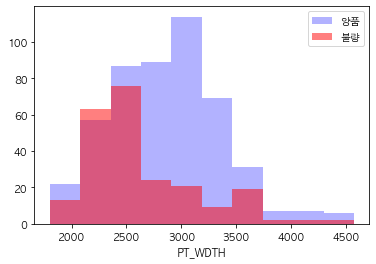

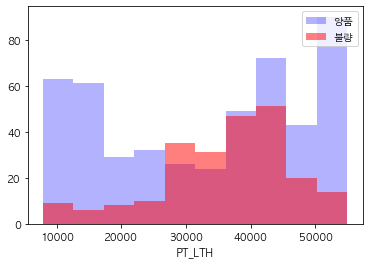

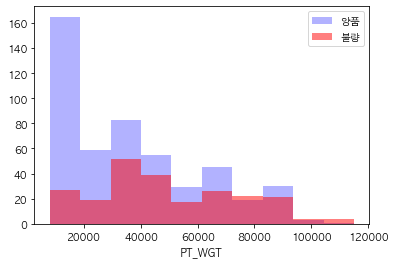

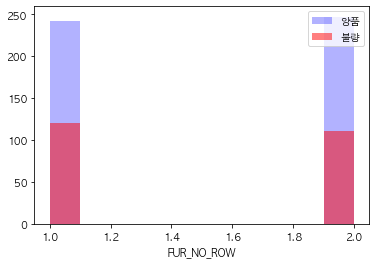

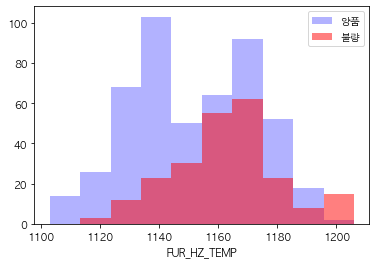

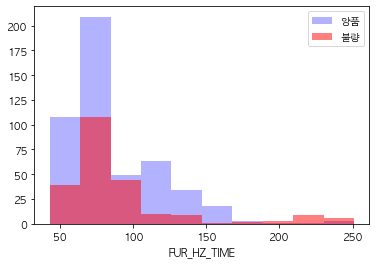

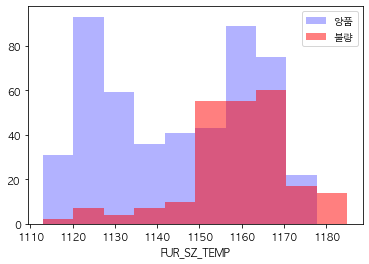

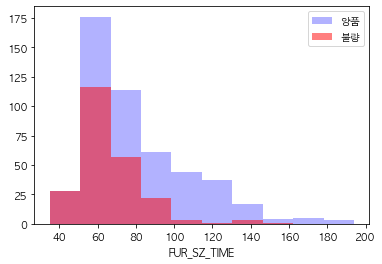

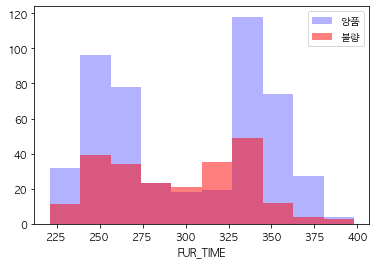

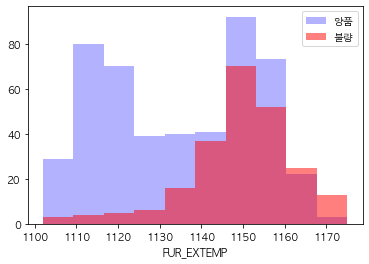

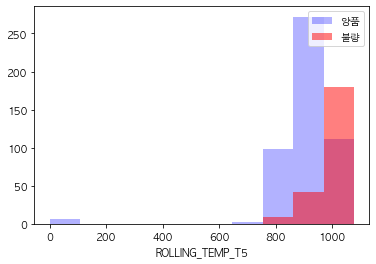

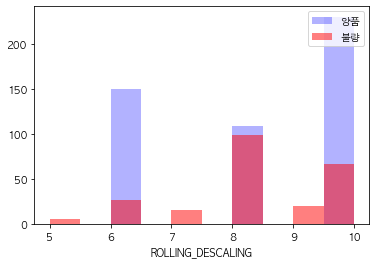

In [30]:
labels=df_num.columns
for label in labels:
    fun_plot_hist(df, label)

# 4-1. ÏòÅÌñ•Ïù∏Ïûê ÏÑ†Ï†ï: Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä

## ÏÑ†ÌòïÌöåÍ∑Ä Î™®Îç∏ Ï†ÅÌï©

In [31]:
#Î™©ÌëúÎ≥ÄÏàò~ÏÑ§Î™ÖÎ≥ÄÏàò
var=' + '.join(df_raw_x.columns)
var='SCALE ~ '+var
print(var)

SCALE ~ PT_THK + PT_WDTH + PT_LTH + PT_WGT + FUR_NO_ROW + FUR_HZ_TEMP + FUR_HZ_TIME + FUR_SZ_TEMP + FUR_SZ_TIME + FUR_TIME + FUR_EXTEMP + ROLLING_TEMP_T5 + ROLLING_DESCALING + STEEL_KIND + FUR_NO + HSB + WORK_GR


In [32]:
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit

df_raw_train, df_raw_test = train_test_split(df_raw,
                                                  test_size = 0.3,
                                                  random_state = 1234)

inputline ='SCALE ~ PT_THK + PT_WDTH + PT_LTH + PT_WGT + FUR_NO_ROW + FUR_HZ_TEMP + FUR_HZ_TIME + FUR_SZ_TEMP + FUR_SZ_TIME + FUR_TIME + FUR_EXTEMP + ROLLING_TEMP_T5 + ROLLING_DESCALING + C(STEEL_KIND) + C(FUR_NO) + C(HSB) + C(WORK_GR)'
scaled_log_model = Logit.from_formula(inputline, df_raw_train)

scaled_log_result = scaled_log_model.fit()
print(scaled_log_result.summary())

         Current function value: 0.257339
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  504
Model:                          Logit   Df Residuals:                      483
Method:                           MLE   Df Model:                           20
Date:                Wed, 22 Sep 2021   Pseudo R-squ.:                  0.5882
Time:                        20:20:50   Log-Likelihood:                -129.70
converged:                      False   LL-Null:                       -314.97
Covariance Type:            nonrobust   LLR p-value:                 2.569e-66
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             32.5737   5.25e+05    6.2e-05      1.000   -1.03e+06    1.03e+06
C(STEEL_KIND)[T.T]     1.6291      1.335 

/Users/dasol/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# 4-2. ÏòÅÌñ•Ïù∏Ïûê ÏÑ†Ï†ï: DT

In [51]:
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# dummy Î≥ÄÏàò ÏÑ§Ï†ï

In [52]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy_x = df_raw_dummy.drop('SCALE', axis=1)
df_raw_dummy_y = df_raw_dummy['SCALE']

# train, test x,y set

In [53]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_dummy_x,df_raw_dummy_y, test_size = 0.3, random_state=1234)
print('train x data size : {}'.format(df_train_x.shape))
print('train y data size : {}'.format(df_train_y.shape))
print('test x data size : {}'.format(df_test_x.shape))
print('test y data size : {}'.format(df_test_y.shape))

train x data size : (504, 24)
train y data size : (504,)
test x data size : (216, 24)
test y data size : (216,)


Text(0, 0.5, 'Î≥ÄÏàò')

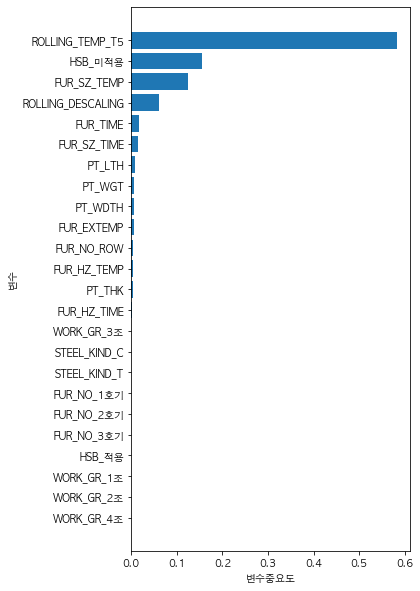

In [54]:

tree_uncustomized =DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_raw_dummy_x, df_raw_dummy_y)

feature_name = df_raw_dummy.drop('SCALE', axis=1).columns

df_importance = pd.DataFrame()
df_importance['Feature'] = feature_name
df_importance['Importance'] = tree_uncustomized.feature_importances_
df_importance.sort_values('Importance', ascending=True, inplace=True)
# df_importance.round(3)

coordinates = range(len(df_importance))
plt.figure(figsize=(5,10))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('Î≥ÄÏàòÏ§ëÏöîÎèÑ')
plt.ylabel('Î≥ÄÏàò')

# 4-3. ÏòÅÌñ•Ïù∏Ïûê ÏÑ†Ï†ï: RF

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_raw_dummy_x, df_raw_dummy_y)
# print('Tree_uncustomized Score on training set: {:3f}'.format(rf_uncustomized.score(df_train_x, df_train_y)))
# print('Tree_uncustomized Score on test set: {:3f}'.format(rf_uncustomized.score(df_test_x, df_test_y)))

RandomForestClassifier(random_state=1234)

Text(0, 0.5, 'Î≥ÄÏàò')

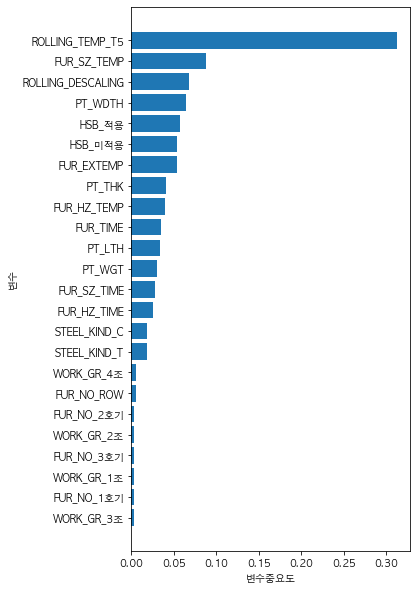

In [56]:
feature_name = df_raw_dummy_x.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = feature_name
df_importance['Importance'] = rf_uncustomized.feature_importances_
df_importance.sort_values('Importance', ascending=True, inplace=True)
# df_importance.round(3)

coordinates = range(len(df_importance))
plt.figure(figsize=(5,10))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('Î≥ÄÏàòÏ§ëÏöîÎèÑ')
plt.ylabel('Î≥ÄÏàò')

# 4-4. ÏòÅÌñ•Ïù∏Ïûê ÏÑ†Ï†ï: GB

In [57]:
from sklearn.ensemble import GradientBoostingClassifier as gbc


gb_uncustomized =gbc(random_state=1234)
gb_uncustomized.fit(df_raw_dummy_x, df_raw_dummy_y)
print("Accuracy in train set:{:.3f}".format(gb_uncustomized.score(df_raw_dummy_x, df_raw_dummy_y)))
# print("Accuracy in test set:{:.3f}".format(gb_uncustomized.score(df_test_x,df_test_y)))


Accuracy in train set:1.000


Text(0, 0.5, 'ÏÑ§Î™ÖÎ≥ÄÏàò')

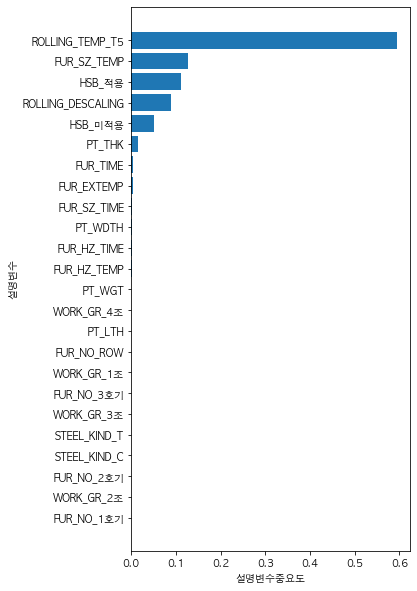

In [58]:
v_feature_name = df_raw_dummy_x.columns
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=gb_uncustomized.feature_importances_

df_importance.sort_values("Importance",ascending=False,inplace=True)
# display(df_importance.round(3))
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.figure(figsize=(5,10))

plt.barh(y=coordinates,width=df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("ÏÑ§Î™ÖÎ≥ÄÏàòÏ§ëÏöîÎèÑ")
plt.ylabel("ÏÑ§Î™ÖÎ≥ÄÏàò")


# 5-1. üìå Í∞úÏÑ†Ïïà ÎèÑÏ∂ú: ÏÑ†Ï†ïÌïú Ï£ºÏöî ÏòÅÌñ•Ïù∏ÏûêÎßåÏùÑ ÏÇ¨Ïö©Ìïú DT Î∂ÑÏÑù

In [59]:
df = pd.read_csv('SCALEÎ∂àÎüâ.csv', engine='python', encoding='cp949')
df['STEEL_KIND'] = df['STEEL_KIND'].apply(lambda x: 'C' if x[0]=='C' else x)
df['STEEL_KIND'] = df['STEEL_KIND'].apply(lambda x: 'T' if x[0]=='T' else x)

df.replace({'SCALE': 'Î∂àÎüâ'}, 1, inplace=True)
df.replace({'SCALE': 'ÏñëÌíà'}, 0, inplace=True)
df_dummy = pd.get_dummies(df)

df_final=df_dummy[['STEEL_KIND_C','FUR_SZ_TEMP', 'ROLLING_TEMP_T5', 'HSB_Ï†ÅÏö©','SCALE']]

In [60]:
df_y = df_final['SCALE']
df_x = df_final.drop('SCALE', axis=1, inplace=False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size=0.3, random_state=1234)

print('train data X size: {}'.format(df_train_x.shape))
print('train data Y size: {}'.format(df_train_y.shape))
print('test data X size: {}'.format(df_test_x.shape))
print('test data Y size: {}'.format(df_test_y.shape))

train data X size: (504, 4)
train data Y size: (504,)
test data X size: (216, 4)
test data Y size: (216,)


## DecisionTreeClassifier Model Ïùò ÏµúÏ†Å ÌååÎùºÎ©îÌÑ∞ ÌÉêÏÉâ: GridSearchCV
best parameter:
{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 4}

best score:
0.956

In [61]:
from sklearn.model_selection import GridSearchCV

para_split= [n_split*2 for n_split in range(2,20)] # Î∂ÑÎ¶¨ ÎÖ∏ÎìúÏùò ÏµúÏÜå ÏûêÎ£å Ïàò
para_leaf= [n_leaf for n_leaf in range(1,20)] # ÏûéÏÇ¨Í∑Ä ÏµúÏÜå ÏûêÎ£å Ïàò
para_depth= [i for i in range(1,11)] # Î∂ÑÎ¶¨ ÎÖ∏ÎìúÏùò ÏµúÏÜå ÏûêÎ£å Ïàò

estimator = DecisionTreeClassifier()
param_grid={"max_depth":para_depth,"min_samples_split":para_split,"min_samples_leaf":para_leaf}
grid_dt= GridSearchCV(estimator,param_grid,scoring="accuracy",n_jobs=-1)
grid_dt.fit(df_train_x,df_train_y)

print("best estimator model:\n{}".format(grid_dt.best_estimator_))
print("\nbest parameter:\n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))

best estimator model:
DecisionTreeClassifier(max_depth=3, min_samples_split=4)

best parameter:
{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 4}

best score:
0.956


## ÏµúÏ†Å ÌååÎùºÎ©îÌÑ∞Î•º ÎåÄÏûÖÌïú Model Í≤∞Í≥º


In [62]:
tree_final =DecisionTreeClassifier(max_depth=3,min_samples_leaf=1,min_samples_split=4, random_state=1234)
tree_final.fit(df_x,df_y) 

DecisionTreeClassifier(max_depth=3, min_samples_split=4, random_state=1234)

In [63]:
pd.crosstab(df_final['SCALE'],df_final['HSB_Ï†ÅÏö©'], margins=True)

HSB_Ï†ÅÏö©   0    1  All
SCALE               
0        0  489  489
1       33  198  231
All     33  687  720

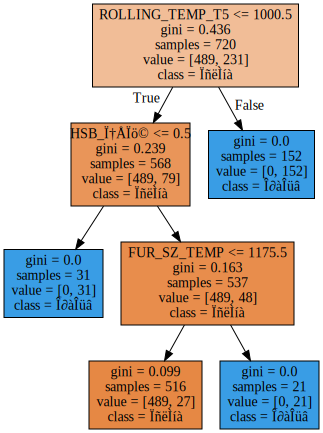

In [64]:
export_graphviz(tree_final,out_file="tree_final.dot",class_names=["ÏñëÌíà","Î∂àÎüâ"],
                    feature_names = df_x.columns,impurity =True,filled=True)
with open("tree_final.dot") as f:
    dot_graph = f.read()
g = graphviz.Source(dot_graph)
g.format='png'
g.render(filename='Final_3')
display(g)

In [65]:
# df_x.columns
df_importance = pd.DataFrame()
df_importance['Feature'] = df_x.columns
df_importance['Importance'] = tree_final.feature_importances_
df_importance.sort_values('Importance', ascending=True, inplace=True)
df_importance.round(3)

Feature  Importance
0     STEEL_KIND_C       0.000
1      FUR_SZ_TEMP       0.138
3           HSB_Ï†ÅÏö©       0.185
2  ROLLING_TEMP_T5       0.677

Text(0, 0.5, 'Î≥ÄÏàò')

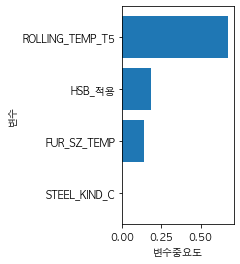

In [66]:
coordinates = range(len(df_importance))
plt.figure(figsize=(2,4))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('Î≥ÄÏàòÏ§ëÏöîÎèÑ')
plt.ylabel('Î≥ÄÏàò')

# 5-2. üìå Í∞úÏÑ†Ïïà ÎèÑÏ∂ú: ÏÑ†Ï†ïÌïú Ï£ºÏöî ÏòÅÌñ•Ïù∏Ïûê Ï§ë ÌïòÎÇòÏùò Î≥ÄÏàòÎßåÏùÑ ÏÇ¨Ïö©Ìïú DT Î∂ÑÏÑù
## Ïù¥Ïú†: vital few ÏÑ§Î™Ö Î≥ÄÏàò ÌïòÎÇòÎ•º decision treeÏóê ÌïôÏäµÏãúÏºúÏÑú Ïó∞ÏÜçÌòï Î≥ÄÏàòÎ•º Î≤îÏ£ºÌôî ÌïúÎã§.
## Ïù¥Î•º ÌÜµÌï¥ Í∞Å  vital few Î≥ÄÏàòÎ•º Ïñ¥Îñ§ Î≤îÏ£ºÏóêÏÑú Í¥ÄÎ¶¨Ìï¥Ïïº Î∂àÎüâÎ•†ÏùÑ ÎÇÆÏ∂ú Ïàò ÏûàÏùÑÏßÄ Í∞úÏÑ†Ïïà ÎèÑÏ∂ú Í∞ÄÎä•ÌïòÎã§.

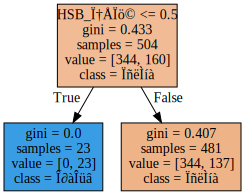

In [67]:
name='HSB_Ï†ÅÏö©'

df_1=df_final[[name,'SCALE']]
df_1_x, df_1_y= df_1.drop('SCALE', axis=1, inplace=False), df_1['SCALE']

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_1_x, df_1_y, test_size=0.3, random_state=1234)


tree_final =DecisionTreeClassifier(max_depth=9,min_samples_leaf=7,min_samples_split=26, random_state=1234)
tree_final.fit(df_train_x,df_train_y) 

export_graphviz(tree_final,out_file="tree_final.dot",class_names=["ÏñëÌíà","Î∂àÎüâ"],
                feature_names = [name],impurity =True,filled=True)
with open("tree_final.dot") as f:
    dot_graph = f.read()
g = graphviz.Source(dot_graph)
g.format='png'
g.render(filename=name)
display(g)

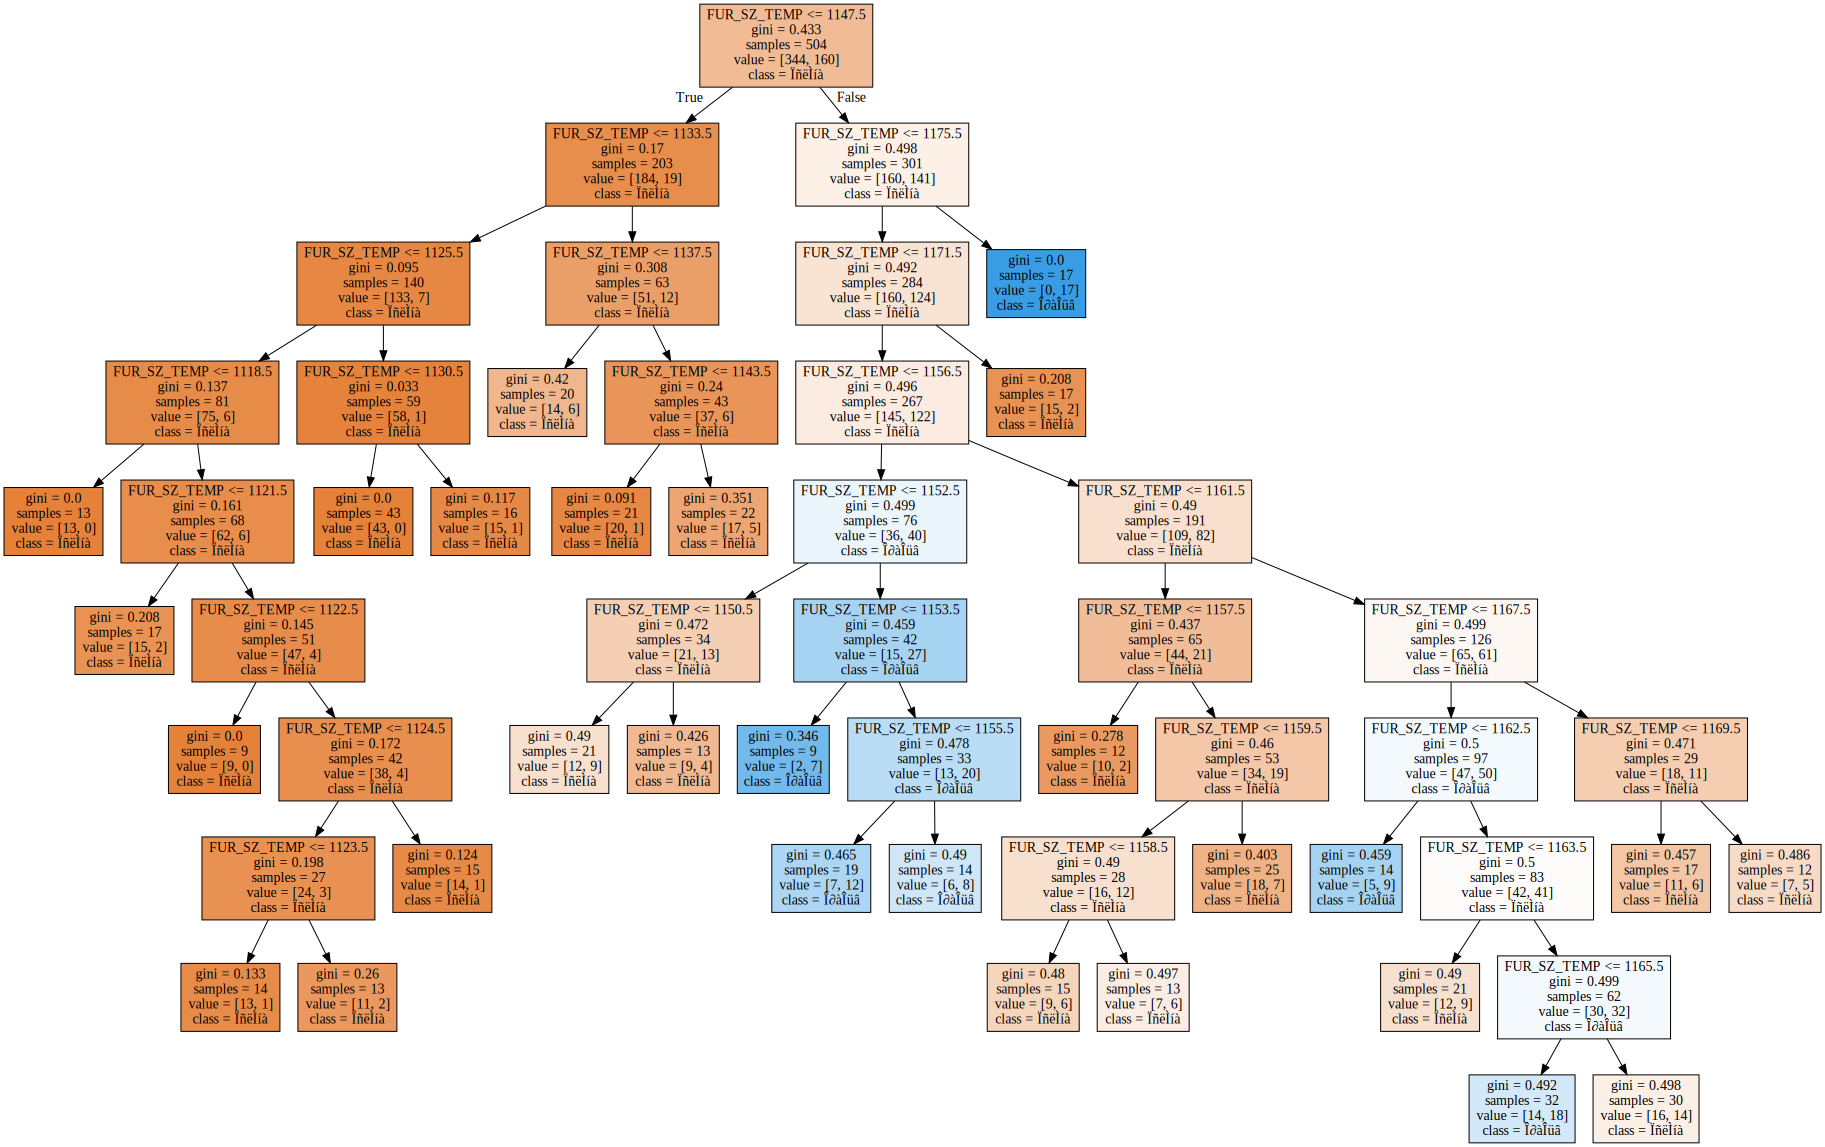

In [68]:
name='FUR_SZ_TEMP'

df_1=df_final[[name,'SCALE']]
df_1_x, df_1_y= df_1.drop('SCALE', axis=1, inplace=False), df_1['SCALE']

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_1_x, df_1_y, test_size=0.3, random_state=1234)


tree_final =DecisionTreeClassifier(max_depth=9,min_samples_leaf=7,min_samples_split=26, random_state=1234)
tree_final.fit(df_train_x,df_train_y) 

export_graphviz(tree_final,out_file="tree_final.dot",class_names=["ÏñëÌíà","Î∂àÎüâ"],
                feature_names = [name],impurity =True,filled=True)
with open("tree_final.dot") as f:
    dot_graph = f.read()
g = graphviz.Source(dot_graph)
g.format='png'
g.render(filename=name)
display(g)

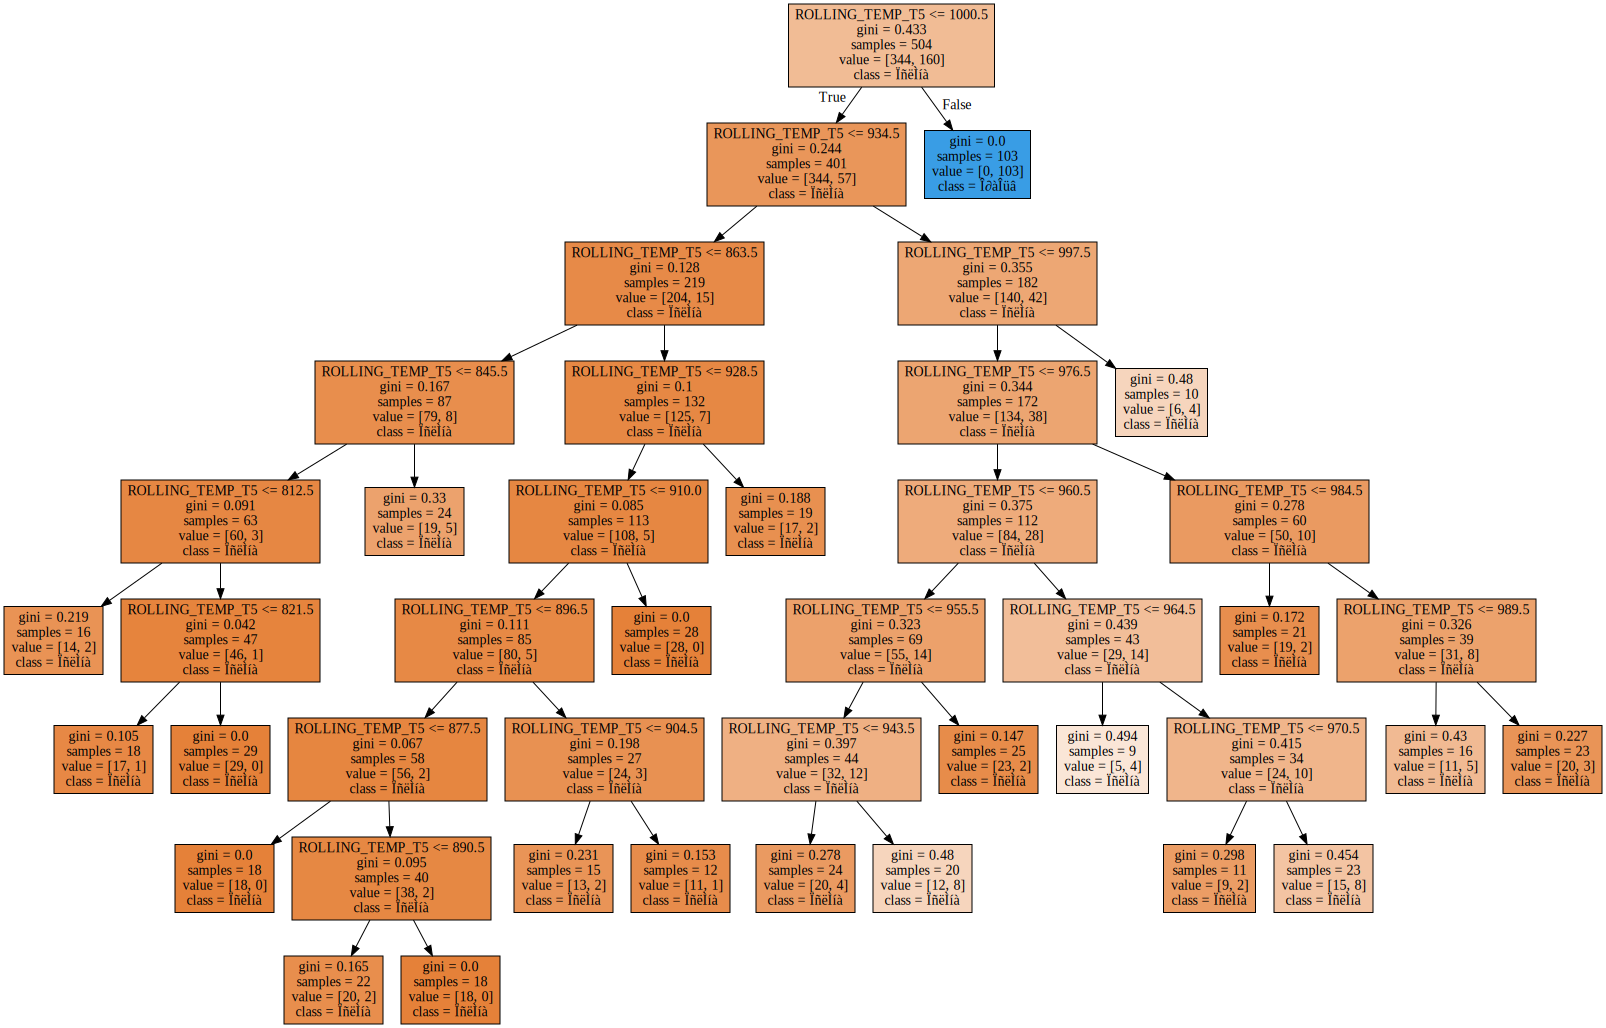

In [69]:
name='ROLLING_TEMP_T5'

df_1=df_final[[name,'SCALE']]
df_1_x, df_1_y= df_1.drop('SCALE', axis=1, inplace=False), df_1['SCALE']

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_1_x, df_1_y, test_size=0.3, random_state=1234)


tree_final =DecisionTreeClassifier(max_depth=9,min_samples_leaf=7,min_samples_split=26, random_state=1234)
tree_final.fit(df_train_x,df_train_y) 

export_graphviz(tree_final,out_file="tree_final.dot",class_names=["ÏñëÌíà","Î∂àÎüâ"],
                feature_names = [name],impurity =True,filled=True)
with open("tree_final.dot") as f:
    dot_graph = f.read()
g = graphviz.Source(dot_graph)
g.format='png'
g.render(filename=name)
display(g)

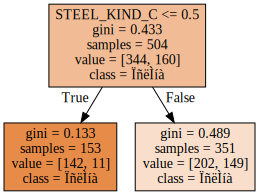

In [71]:
name='STEEL_KIND_C'

df_1=df_final[[name,'SCALE']]
df_1_x, df_1_y= df_1.drop('SCALE', axis=1, inplace=False), df_1['SCALE']

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_1_x, df_1_y, test_size=0.3, random_state=1234)


tree_final =DecisionTreeClassifier(max_depth=9,min_samples_leaf=7,min_samples_split=26, random_state=1234)
tree_final.fit(df_train_x,df_train_y) 

export_graphviz(tree_final,out_file="tree_final.dot",class_names=["ÏñëÌíà","Î∂àÎüâ"],
                feature_names = [name],impurity =True,filled=True)
with open("tree_final.dot") as f:
    dot_graph = f.read()
g = graphviz.Source(dot_graph)
g.format='png'
g.render(filename=name)
display(g)

# 5-3. Í∞úÏÑ†Ïïà ÎèÑÏ∂ú with scaled-data

train data X size: (504, 3)
train data Y size: (504,)
test data X size: (216, 3)
test data Y size: (216,)


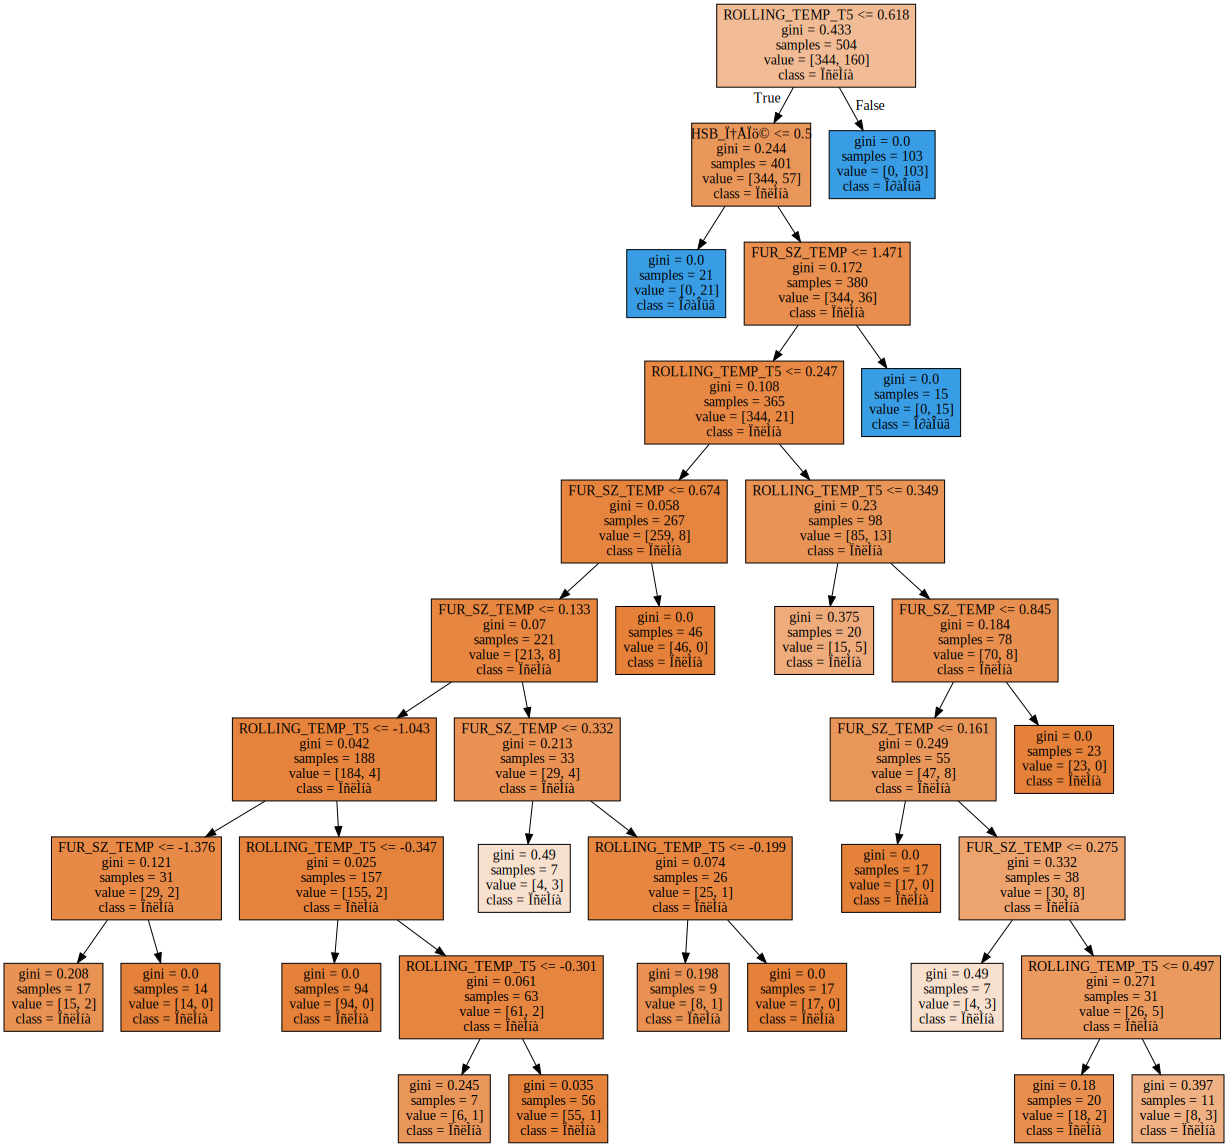

In [66]:
df_final=df_raw_dummy[['FUR_SZ_TEMP', 'ROLLING_TEMP_T5', 'HSB_Ï†ÅÏö©','SCALE']]
df_final_y = df_final['SCALE']
df_final_x = df_final.drop('SCALE', axis=1, inplace=False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_final_x, df_final_y, test_size=0.3, random_state=1234)

print('train data X size: {}'.format(df_train_x.shape))
print('train data Y size: {}'.format(df_train_y.shape))
print('test data X size: {}'.format(df_test_x.shape))
print('test data Y size: {}'.format(df_test_y.shape))

tree_final =DecisionTreeClassifier(max_depth=9,min_samples_leaf=7,min_samples_split=26, random_state=1234)
tree_final.fit(df_train_x,df_train_y) 

export_graphviz(tree_final,out_file="tree_final.dot",class_names=["ÏñëÌíà","Î∂àÎüâ"],
                feature_names = df_final_x.columns,impurity =True,filled=True)
with open("tree_final.dot") as f:
    dot_graph = f.read()
g = graphviz.Source(dot_graph)
g.format='png'
g.render(filename='final')
display(g)